In [21]:
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from scipy.optimize import curve_fit
import itertools

from utils.model import hill_activation, hill_activation_single, hill_activation_and, random_search, hill_activation_ymin_ymax
from utils.helper import generate_data_at_t, generate_data_at_t_2, sum_squared_error, \
                       get_blank_corrected, get_neg_ctrl_corrected, get_pos_ctrl_corrected, \
                       generate_data, setup_header, read_map
from utils.plotter import plot_heatmap

In [2]:
folder = '300-and-gates-3K3'
cumas = [0.0014454397707459278, 0.0019057554535797324, 0.006249131232988513, 0.04999229196321327, 0.3736971000332177, 1.026212159295428]
aras = [0.011481536214968831, 1.0216094089843173, 5.683218062541121, 7.456853829419365, 7.579011602828942, 7.585426288573858]

In [8]:
data = pd.read_csv('datasets/experiment/{}/selected-low-error-gates.csv'.format(folder))
gates = data.columns.tolist()
data.head()

,e17x32STPhoRadA,e32x33NrdJ1,e16x32STPhoRadA,e22x30SspGyrB,e38x33MjaKlbA,e17x33NrdJ1,e11x33NrdA2,e22x33NrdJ1,e20x33NrdJ1,e17x30MjaKlbA,e17x32NrdJ1,e17x33NrdA2
0,0.007100,0.006146,0.004567,0.010929,0.004649,0.003312,0.010029,0.000918,0.003429,0.004883,0.010906,0.006731
1,0.008038,0.006583,0.002959,0.011661,0.005611,0.002688,0.011194,0.007272,0.004934,0.016889,0.014834,0.008045
2,0.008198,0.007190,0.001980,0.014227,0.005414,0.004389,0.011337,0.006769,0.005234,0.024749,0.015805,0.007689
3,0.007978,0.007432,0.002110,0.011308,0.005307,0.004701,0.011511,0.006190,0.005008,0.030385,0.016490,0.008188
4,0.007893,0.008658,0.002113,0.016690,0.005081,0.004315,0.012028,0.006143,0.006068,0.031742,0.016246,0.007248


In [26]:
gate = gates[1]

In [62]:
x2, x1 = np.meshgrid(aras, cumas)
x = np.vstack((x2.ravel(), x1.ravel()))
y = np.abs(data[gate].values)
gate_bounds = [[0, 0.01, 0, 0],
               [1e4, 1e3, 1e2, 1e-1]]
init_guess = random_search(50, x, y, gate_bounds, hill_activation_and)
popt, pcov = curve_fit(hill_activation_and, x, y, p0=init_guess, bounds=gate_bounds)

In [64]:
popt

array([1.55947881, 0.67092039, 1.41260774, 0.01597188])

In [85]:
data2

,e17x32STPhoRadA,e32x33NrdJ1,e16x32STPhoRadA,e22x30SspGyrB,e38x33MjaKlbA,e17x33NrdJ1,e11x33NrdA2,e22x33NrdJ1,e20x33NrdJ1,e17x30MjaKlbA,e17x32NrdJ1,e17x33NrdA2,cuma,ara
0,0.007100,0.006146,0.004567,0.010929,0.004649,0.003312,0.010029,0.000918,0.003429,0.004883,0.010906,0.006731,0.001445,0.011482
1,0.008038,0.006583,0.002959,0.011661,0.005611,0.002688,0.011194,0.007272,0.004934,0.016889,0.014834,0.008045,0.001445,1.021609
2,0.008198,0.007190,0.001980,0.014227,0.005414,0.004389,0.011337,0.006769,0.005234,0.024749,0.015805,0.007689,0.001445,5.683218
3,0.007978,0.007432,0.002110,0.011308,0.005307,0.004701,0.011511,0.006190,0.005008,0.030385,0.016490,0.008188,0.001445,7.456854
4,0.007893,0.008658,0.002113,0.016690,0.005081,0.004315,0.012028,0.006143,0.006068,0.031742,0.016246,0.007248,0.001445,7.579012
5,0.008538,0.007613,0.001392,0.018164,0.005664,0.005341,0.011664,0.006577,0.006009,0.036208,0.014809,0.008698,0.001445,7.585426
6,0.006405,0.006614,0.007668,0.011223,0.003596,0.004158,0.006651,0.002903,0.004241,0.003647,0.011600,0.001559,0.001906,0.011482
7,0.011435,0.012366,0.017678,0.038235,0.006288,0.009469,0.005084,0.016771,0.013102,0.033540,0.028569,0.012351,0.001906,1.021609
8,0.015039,0.013827,0.027725,0.069483,0.007948,0.007061,0.005090,0.018616,0.015842,0.056509,0.034259,0.018831,0.001906,5.683218
9,0.016122,0.014363,0.034694,0.100310,0.008246,0.007145,0.006078,0.010465,0.017033,0.076395,0.016949,0.026837,0.001906,7.456854


In [86]:
data2 = data.copy()
inducers = [cumas, aras]
data2['cuma'] = [i[0] for i in (itertools.product(*inducers))]
data2['ara'] = [i[1] for i in (itertools.product(*inducers))]

actual = data2[[gate, 'cuma', 'ara']].pivot('cuma', 'ara')
actual.index = cumas
actual.columns = aras
actual

,0.011482,1.021609,5.683218,7.456854,7.579012,7.585426
0.001445,0.006146,0.006583,0.007190,0.007432,0.008658,0.007613
0.001906,0.006614,0.012366,0.013827,0.014363,0.015372,0.016077
0.006249,0.010548,0.047622,0.063671,0.057078,0.057246,0.056098
0.049992,0.021025,0.293198,0.357306,0.365948,0.376005,0.380110
0.373697,0.037112,0.849351,1.266421,1.417751,1.463352,1.471954
1.026212,0.036794,0.991655,1.293197,1.459678,1.532985,1.609202


In [89]:
x2, x1 = np.meshgrid(aras, cumas)
x = np.vstack((x1.ravel(), x2.ravel()))
x

array([[1.44543977e-03, 1.44543977e-03, 1.44543977e-03, 1.44543977e-03,
        1.44543977e-03, 1.44543977e-03, 1.90575545e-03, 1.90575545e-03,
        1.90575545e-03, 1.90575545e-03, 1.90575545e-03, 1.90575545e-03,
        6.24913123e-03, 6.24913123e-03, 6.24913123e-03, 6.24913123e-03,
        6.24913123e-03, 6.24913123e-03, 4.99922920e-02, 4.99922920e-02,
        4.99922920e-02, 4.99922920e-02, 4.99922920e-02, 4.99922920e-02,
        3.73697100e-01, 3.73697100e-01, 3.73697100e-01, 3.73697100e-01,
        3.73697100e-01, 3.73697100e-01, 1.02621216e+00, 1.02621216e+00,
        1.02621216e+00, 1.02621216e+00, 1.02621216e+00, 1.02621216e+00],
       [1.14815362e-02, 1.02160941e+00, 5.68321806e+00, 7.45685383e+00,
        7.57901160e+00, 7.58542629e+00, 1.14815362e-02, 1.02160941e+00,
        5.68321806e+00, 7.45685383e+00, 7.57901160e+00, 7.58542629e+00,
        1.14815362e-02, 1.02160941e+00, 5.68321806e+00, 7.45685383e+00,
        7.57901160e+00, 7.58542629e+00, 1.14815362e-02, 1.02160

In [196]:
ind1 = np.logspace(-3, 2, 100)
ind2 = np.logspace(-3, 2, 100)

popt = [1.55947881, 0.67092039, 1.41260774, 0.01597188]

x2, x1 = np.meshgrid(ind2, cumas)
x = np.vstack((x2.ravel(), x1.ravel()))
y_pred = hill_activation_and(x, *popt)
pred = pd.DataFrame(x.T)
pred['y'] = y_pred
training = pred.pivot(1, 0)
training.index = cumas
training.columns = ind2
training

,0.001000,0.001123,0.001262,0.001417,0.001592,0.001789,0.002009,0.002257,0.002535,0.002848,0.003199,0.003594,0.004037,0.004535,0.005094,0.005722,0.006428,0.007221,0.008111,0.009112,0.010235,0.011498,0.012915,0.014508,0.016298,0.018307,0.020565,0.023101,0.025950,0.029151,0.032745,0.036784,0.041320,0.046416,0.052140,0.058570,0.065793,0.073907,0.083022,0.093260,0.104762,0.117681,0.132194,0.148497,0.166810,0.187382,0.210490,0.236449,0.265609,0.298365,0.335160,0.376494,0.422924,0.475081,0.533670,0.599484,0.673415,0.756463,0.849753,0.954548,1.072267,1.204504,1.353048,1.519911,1.707353,1.917910,2.154435,2.420128,2.718588,3.053856,3.430469,3.853529,4.328761,4.862602,5.462277,6.135907,6.892612,7.742637,8.697490,9.770100,10.974988,12.328467,13.848864,15.556761,17.475284,19.630407,22.051307,24.770764,27.825594,31.257158,35.111917,39.442061,44.306215,49.770236,55.908102,62.802914,70.548023,79.248290,89.021509,100.000000
0.001445,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024909,0.024909,0.024909,0.024909,0.024909,0.024910,0.024910,0.024910,0.024911,0.024911,0.024912,0.024913,0.024913,0.024914,0.024916,0.024917,0.024919,0.024921,0.024923,0.024926,0.024929,0.024932,0.024937,0.024942,0.024948,0.024955,0.024964,0.024974,0.024986,0.025000,0.025016,0.025035,0.025058,0.025085,0.025116,0.025154,0.025197,0.025249,0.025310,0.025382,0.025466,0.025566,0.025683,0.025822,0.025985,0.026177,0.026404,0.026670,0.026984,0.027355,0.027791,0.028304,0.028909,0.029621,0.030460,0.031447,0.032608,0.033975,0.035583,0.037473,0.039695,0.042305,0.045370,0.048966,0.053182,0.058120,0.063899,0.070653,0.078535,0.087718,0.098395,0.110781,0.125112,0.141641,0.160639,0.182385
0.001906,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024909,0.024909,0.024909,0.024909,0.024909,0.024909,0.024910,0.024910,0.024910,0.024911,0.024911,0.024912,0.024913,0.024914,0.024915,0.024916,0.024918,0.024919,0.024921,0.024924,0.024927,0.024930,0.024934,0.024939,0.024944,0.024951,0.024958,0.024967,0.024978,0.024991,0.025005,0.025023,0.025043,0.025068,0.025096,0.025130,0.025169,0.025216,0.025271,0.025336,0.025412,0.025502,0.025608,0.025733,0.025880,0.026054,0.026258,0.026499,0.026783,0.027117,0.027511,0.027975,0.028521,0.029164,0.029922,0.030813,0.031863,0.033098,0.034551,0.036260,0.038270,0.040631,0.043404,0.046659,0.050478,0.054954,0.060195,0.066325,0.073486,0.081837,0.091560,0.102856,0.115947,0.131076,0.148505,0.168506,0.191363,0.217355,0.246747
0.006249,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024908,0.024909,0.024909,0.024909,0.024909,0.024909,0.024909,0.024910,0.024910,0.024911,0.024911,0.024912,0.024912,0.024913,0.024914,0.024915,0.024916,0.024918,0.024920,0.024922,0.024924,0.024927,0.024931,0.024935,0.024940,0.024946,0.024952,0.024960,0.024970,0.024981,0.024994,0.025009,0.025027,0.025048,0.025073,0.025103,0.025137,0.025178,0.025227,0.025284,0.025351,0.025430,0.025523,0.025633,0.025762,0.025915,0.026094,0.026306,0.026555,0.026849,0.027195,0.027603,0.028083,0.028649,0.029315,0.030099,0.031022,0.032108,0.033387,0.034891,0.036659,0.038739,0.041182,0.044051,0.047419,0.051368,0.055997,0.061416,0.067752,0.075150,0.083777,0.093815,0.105472,0.118974,0.134568,0.152519,0.173102,0.196600,0.223291,0.253435,0.287261,0.324943,0.366584,0.412191,0.461657,0.514743,0.571072,0.630126,0.691261,0.753728
0.049992,0.024910,0.024910,0.024911,0.024912,0.024912,0.024913,0.024914,0.024915,0.024916,0.024918,0.024920,0.024922,0.024924,0.024927,0.024930,0.024934,0.024939,0.024945,0.024951,0.024959,0.024968,0.024979,0.024992,0.025007,0.025025,0.025045,0.025070,0.025099,0.025133,0.025173,0.025221,0.025276,0.025342,0.025420,0.025511,0.025619,0.025746,0.025895,

In [197]:
x2_, x1_ = np.meshgrid(aras, ind1)
x_ = np.vstack((x2_.ravel(), x1_.ravel()))
y_pred = hill_activation_and(x_, *popt)
pred = pd.DataFrame(x_.T)
pred['y'] = y_pred
training = pred.pivot(1, 0)
training.index = ind1
training.columns = aras
training

,0.011482,1.021609,5.683218,7.456854,7.579012,7.585426
0.001000,0.024908,0.025069,0.026721,0.027568,0.027629,0.027632
0.001123,0.024908,0.025097,0.027044,0.028041,0.028114,0.028118
0.001262,0.024908,0.025131,0.027425,0.028600,0.028685,0.028690
0.001417,0.024908,0.025171,0.027874,0.029257,0.029357,0.029363
0.001592,0.024908,0.025218,0.028402,0.030031,0.030149,0.030155
...,...,...,...,...,...,...
62.802914,0.831228,1.557038,1.559262,1.559331,1.559335,1.559335
70.548023,0.893687,1.557407,1.559295,1.559354,1.559357,1.559357
79.248290,0.954806,1.557721,1.559323,1.559373,1.559375,1.559375
89.021509,1.013838,1.557987,1.559347,1.559389,1.559391,1.559391


ValueError: Length of values (1000) does not match length of index (600)

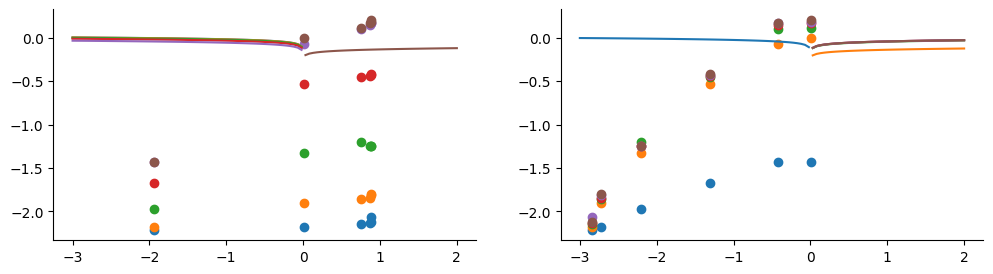

In [60]:
popt = [0.19297953, -0.17332894,  0.15002125, -1.79664499]

f, axs = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(2*6, 1*3))
axr = axs.ravel()

ind2 = np.logspace(-3, 2, 100)
x2_, x1_ = np.meshgrid(ind2, cumas)
x_ = np.log10(np.vstack((x2_.ravel(), x1_.ravel())))
y_pred = hill_activation_and(x_, *popt)

pred = pd.DataFrame(x_.T)
pred['y'] = y_pred
training = pred.pivot(1, 0)
training.index = np.log10(cumas)
training.columns = np.log10(ind2)

for i in range(len(actual)):
    axr[0].scatter(actual.columns, actual.iloc[i, :])
    axr[0].plot(training.columns, training.iloc[i, :])
#axr[0].loglog()

ind1 = np.logspace(-3, 2, 100)
x2_, x1_ = np.meshgrid(aras, ind1)
x_ = np.log10(np.vstack((x2_.ravel(), x1_.ravel())))
y_pred = hill_activation_and(x_, *popt)

pred = pd.DataFrame(x_.T)
pred['y'] = y_pred
training = pred.pivot(1, 0)
training.index = np.log10(ind1)
training.columns = np.log10(aras)

for i in range(len(actual.columns)):
    axr[1].scatter(actual.index, actual.iloc[:, i])
    axr[1].plot(training.index, training.iloc[:, i])
#axr[1].loglog()

sns.despine()

In [84]:
print(gate)
data[gate]

e32x33NrdJ1


0     0.006146
1     0.006583
2     0.007190
3     0.007432
4     0.008658
5     0.007613
6     0.006614
7     0.012366
8     0.013827
9     0.014363
10    0.015372
11    0.016077
12    0.010548
13    0.047622
14    0.063671
15    0.057078
16    0.057246
17    0.056098
18    0.021025
19    0.293198
20    0.357306
21    0.365948
22    0.376005
23    0.380110
24    0.037112
25    0.849351
26    1.266421
27    1.417751
28    1.463352
29    1.471954
30    0.036794
31    0.991655
32    1.293197
33    1.459678
34    1.532985
35    1.609202
Name: e32x33NrdJ1, dtype: float64

In [80]:
y

array([0.00614629, 0.00658342, 0.00719037, 0.00743162, 0.00865811,
       0.00761314, 0.00661392, 0.01236566, 0.01382707, 0.01436326,
       0.01537244, 0.01607654, 0.01054806, 0.04762198, 0.06367122,
       0.05707803, 0.05724563, 0.05609783, 0.0210247 , 0.29319836,
       0.3573059 , 0.36594768, 0.37600507, 0.38010999, 0.03711153,
       0.84935111, 1.26642125, 1.41775118, 1.4633523 , 1.47195398,
       0.03679363, 0.9916547 , 1.29319696, 1.45967772, 1.53298541,
       1.60920231])

In [79]:
x

array([[1.14815362e-02, 1.02160941e+00, 5.68321806e+00, 7.45685383e+00,
        7.57901160e+00, 7.58542629e+00, 1.14815362e-02, 1.02160941e+00,
        5.68321806e+00, 7.45685383e+00, 7.57901160e+00, 7.58542629e+00,
        1.14815362e-02, 1.02160941e+00, 5.68321806e+00, 7.45685383e+00,
        7.57901160e+00, 7.58542629e+00, 1.14815362e-02, 1.02160941e+00,
        5.68321806e+00, 7.45685383e+00, 7.57901160e+00, 7.58542629e+00,
        1.14815362e-02, 1.02160941e+00, 5.68321806e+00, 7.45685383e+00,
        7.57901160e+00, 7.58542629e+00, 1.14815362e-02, 1.02160941e+00,
        5.68321806e+00, 7.45685383e+00, 7.57901160e+00, 7.58542629e+00],
       [1.44543977e-03, 1.44543977e-03, 1.44543977e-03, 1.44543977e-03,
        1.44543977e-03, 1.44543977e-03, 1.90575545e-03, 1.90575545e-03,
        1.90575545e-03, 1.90575545e-03, 1.90575545e-03, 1.90575545e-03,
        6.24913123e-03, 6.24913123e-03, 6.24913123e-03, 6.24913123e-03,
        6.24913123e-03, 6.24913123e-03, 4.99922920e-02, 4.99922

In [99]:
cumas

[0.0014454397707459278,
 0.0019057554535797324,
 0.006249131232988513,
 0.04999229196321327,
 0.3736971000332177,
 1.026212159295428]

In [112]:
ind2 = np.logspace(-3, 2, 100)
x2_, x1_ = np.meshgrid(ind2, cumas)
x_ = np.vstack((x1_.ravel(), x2_.ravel()))
y_pred = hill_activation_and(x_, *popt)
pred = pd.DataFrame(x_.T)
pred['y'] = y_pred
pred
#training = pred.pivot(0, 1)
#training

,0,1,y
0,0.001445,0.001000,0.006238
1,0.001445,0.001123,0.006238
2,0.001445,0.001262,0.006238
3,0.001445,0.001417,0.006238
4,0.001445,0.001592,0.006238
...,...,...,...
595,1.026212,62.802914,1.558415
596,1.026212,70.548023,1.558576
597,1.026212,79.248290,1.558713
598,1.026212,89.021509,1.558829


In [119]:
ind2 = np.logspace(-3, 2, 100)
x2_, x1_ = np.meshgrid(ind2, cumas)
x_ = np.vstack((x2_.ravel(), x1_.ravel()))
y_pred = hill_activation_and(x_, *popt)
pred = pd.DataFrame(x_.T)
pred['y'] = y_pred
pred

,0,1,y
0,0.001000,0.001445,0.006238
1,0.001123,0.001445,0.006238
2,0.001262,0.001445,0.006238
3,0.001417,0.001445,0.006238
4,0.001592,0.001445,0.006238
...,...,...,...
595,62.802914,1.026212,1.558415
596,70.548023,1.026212,1.558576
597,79.248290,1.026212,1.558713
598,89.021509,1.026212,1.558829


In [178]:
def hill_activation_standard(x, K, n):
    
    return ((x**n) / (K**n + x**n))

def hill_activation_and_modif(x, bn, an, bc, ac, ae, bg, ag, K, n):

    x1, x2 = x
    N = bn + an * x1
    C = bc + ac * x2
    E = ae * N * C
    return bg + ag * hill_activation_standard(E, K, n)

In [189]:
popt = [0.004, 3, 0.004, 1.55947881, 5, 0.004, 1.55947881, 0.37092039, 1.41260774]
ind1 = np.logspace(-3, 2, 100)
ind2 = np.logspace(-3, 2, 10)
x2_, x1_ = np.meshgrid(ind2, ind1)
x_ = np.vstack((x2_.ravel(), x1_.ravel()))
y_pred = hill_activation_and_modif(x_, *popt)
pred = pd.DataFrame(x_.T)
pred['y'] = y_pred
training = pred.pivot(1, 0)
training.index = ind1
training.columns = ind2

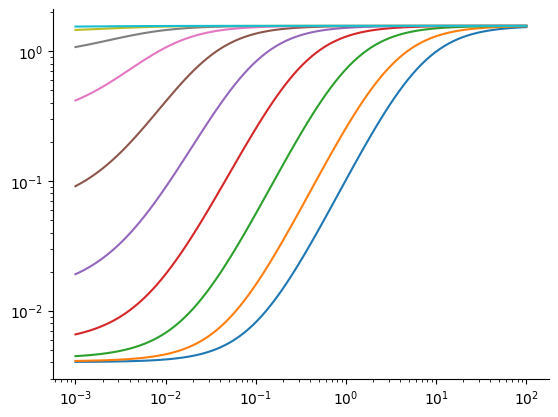

In [190]:
for i in range(len(training.columns)):
    plt.plot(training.index, training.iloc[:, i])
plt.loglog()
sns.despine()

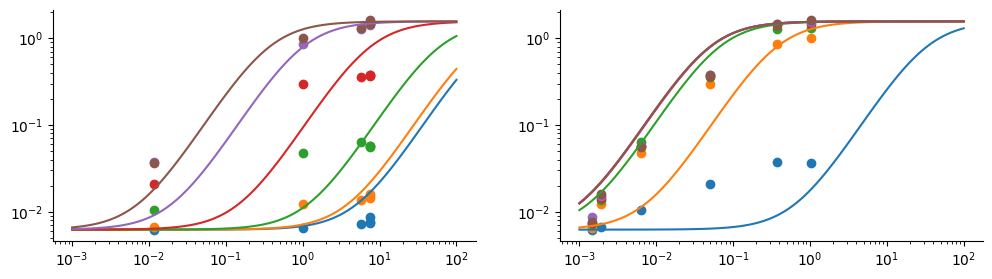

In [138]:
popt = [1.55947881, 0.37092039, 1.41260774, 0.004]

f, axs = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(2*6, 1*3))
axr = axs.ravel()

data2 = data.copy()
inducers = [cumas, aras]
data2['cuma'] = [i[0] for i in (itertools.product(*inducers))]
data2['ara'] = [i[1] for i in (itertools.product(*inducers))]

actual = data2[[gate, 'cuma', 'ara']].pivot('cuma', 'ara')
actual.index = cumas
actual.columns = aras

ind2 = np.logspace(-3, 2, 100)
x2_, x1_ = np.meshgrid(ind2, cumas)
x_ = np.vstack((x1_.ravel(), x2_.ravel()))
y_pred = hill_activation_and(x_, *popt)

pred = pd.DataFrame(x_.T)
pred['y'] = y_pred
training = pred.pivot(0, 1)
training.index = cumas
training.columns = ind2

for i in range(len(actual)):
    axr[0].scatter(actual.columns, actual.iloc[i, :])
    axr[0].plot(training.columns, training.iloc[i, :])
axr[0].loglog()

ind1 = np.logspace(-3, 2, 100)
x2_, x1_ = np.meshgrid(aras, ind1)
x_ = np.vstack((x1_.ravel(), x2_.ravel()))
y_pred = hill_activation_and(x_, *popt)

pred = pd.DataFrame(x_.T)
pred['y'] = y_pred
training = pred.pivot(0, 1)
training.index = ind1
training.columns = aras

for i in range(len(actual.columns)):
    axr[1].scatter(actual.index, actual.iloc[:, i])
    axr[1].plot(training.index, training.iloc[:, i])
axr[1].loglog()

sns.despine()